In [24]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [25]:
data=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/SAT%20GPA.csv")
data.head()

,SAT,GPA
0,1270,3.4
1,1220,4.0
2,1160,3.8
3,950,3.8
4,1070,4.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     1000 non-null   int64  
 1   GPA     1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [27]:
data.describe()

,SAT,GPA
count,1000.000000,1000.000000
mean,1033.290000,3.203700
std,142.873681,0.542541
min,530.000000,1.800000
25%,930.000000,2.800000
50%,1030.000000,3.200000
75%,1130.000000,3.700000
max,1440.000000,4.500000


In [28]:
data.columns

Index(['SAT', 'GPA'], dtype='object')

#Train Test Split

In [29]:
x,tx=train_test_split(data,random_state=2529)

#Correlation

In [30]:
t1=x.values.tolist()

n=len(x)
xm=1033.290000
ym=3.203700
xsd=142.873681
ysd=0.542541

r=0

for t in t1:
  r+=(t[0]-xm)*(t[1]-ym)

r/=(n*xsd*ysd)
r

0.4238915628611607

#Least Square Approximator

In [31]:
X=np.zeros((n,2))
Y=np.zeros(n)

i=0
for t in t1:
  X[i][0]=t[0]
  X[i][1]=1
  Y[i]=t[1]
  i+=1

Xt=np.transpose(X)

xty=Xt @ Y
xtx=Xt @ X
inx=np.linalg.inv(xtx)
C=inx @ xty

def lsa(temp):
  a=np.zeros(2)
  a[0]=temp
  a[1]=1

  return np.dot(C,a)

#Testing The Model

In [32]:
N=len(tx)
para=tx.values.tolist()
e=0
act=np.zeros(N)
prd=np.zeros(N)
i=0
for t in para:
  act[i]=t[1]
  prd[i]=lsa(t[0])
  j=act[i]-prd[i]
  e+=(j*j)
  i+=1

e=math.sqrt(e/N)
print('Root Mean Square Error')
print(e)

Root Mean Square Error
0.4888529457413275


#Visualization of Actual vs Predicted

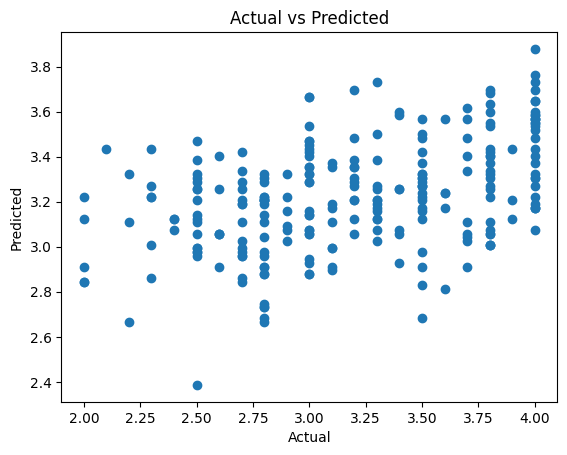

In [33]:
import matplotlib.pyplot as plt
plt.scatter(act,prd)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()